Serie temporal sistema lagunar peine

ingreso de series temporales de pozos de monitoreo de nivel en peine, mediciones por SQM 

In [93]:

import os
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt
import pymannkendall as mk
import numpy as np


ps.set_log_level("ERROR")
ps.show_versions()

Pastas version: 1.8.1
Python version: 3.11.8
NumPy version: 2.1.3
Pandas version: 2.2.3
SciPy version: 1.15.2
Matplotlib version: 3.10.0
Numba version: 0.61.0


aca se configura la ruta a la base de datos , para los niveles, la precipitacion y la evaporacion.

In [94]:
# --- Paso 1: Configuración inicial ---


carpeta_pozos = os.path.join('datos', 'pozos nivel peine')

# Rutas de los archivos de estrés (precipitación y evaporación)
archivos_precipitacion = [os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA9-1 (Interna).csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA10-1.csv')]
archivos_evaporacion = [os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_CHAXA.csv'), 
                        os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_LZA9-1 (Interna).csv')]

In [95]:
reference_levels = pd.Series({
    "1024": 2300.950,
    "1028": 2301.448,
    "2037": 2301.929,
    "2018": 2301.762,
    "GD-03": 2301.051,
    "GD-04": 2300.880,
    "L10-1": 2305.996,
    "L10-2": 2301.602,
    "L10-3": 2301.877,
    "L10-4": 2301.882,
    "L10-5": 2301.747,
    "L10-6": 2301.760,
    "L10-7": 2301.976,
    "L10-8": 2301.993,
    "L10-9": 2302.035,
    "L10-10": 2302.046,
    "L10-11": 2301.782,
    "L10-12": 2301.832,
    "L10-13": 2301.961,
    "L10-14": 2302.007,
    "L10-15": 2301.859,
    "L10-16": 2301.935,
    "L10-17": 2301.901,
    "REGLILLA INTERNA CONAF": 2301.456,
    "REGLILLA SALADA CONAF": 2301.963,
    "REGLILLA SALADITA CONAF": 2301.762
})

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a fo

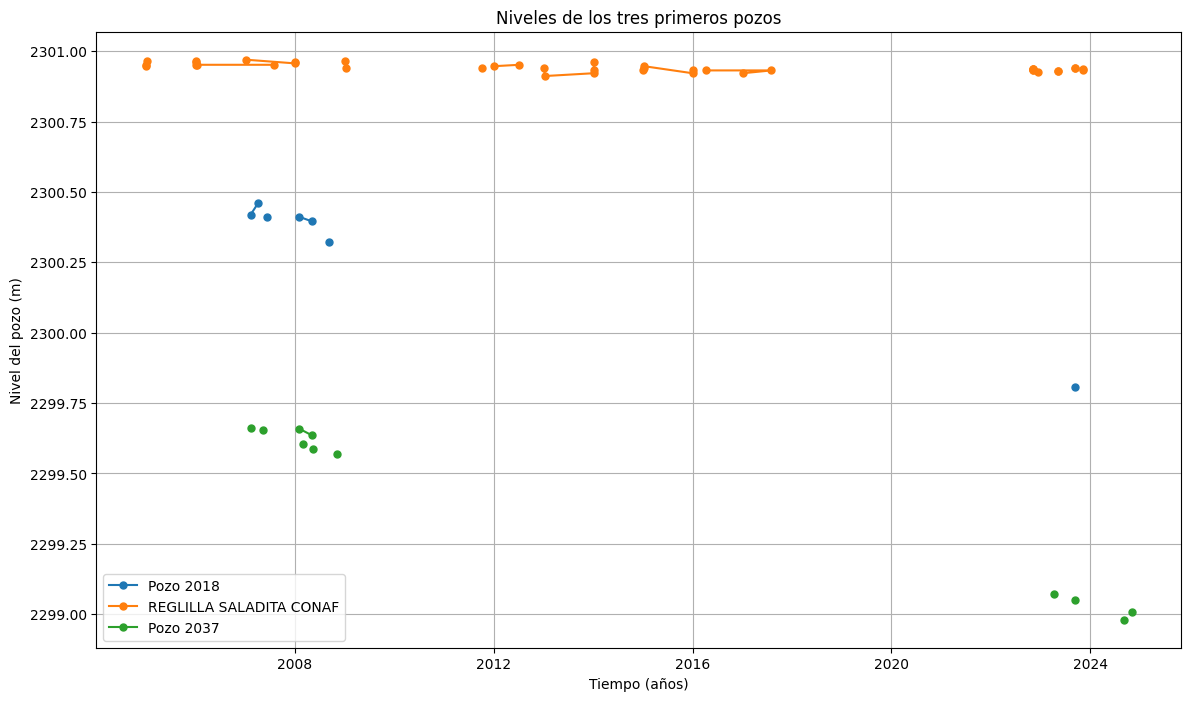

**********
Fecha
1999-08-01    0.0
1999-08-02    0.0
1999-08-03    0.0
1999-08-04    0.0
1999-08-05    0.0
             ... 
2024-12-27    0.0
2024-12-28    0.0
2024-12-29    0.0
2024-12-30    0.0
2024-12-31    0.0
Freq: D, Name: Precipitación, Length: 9285, dtype: float64


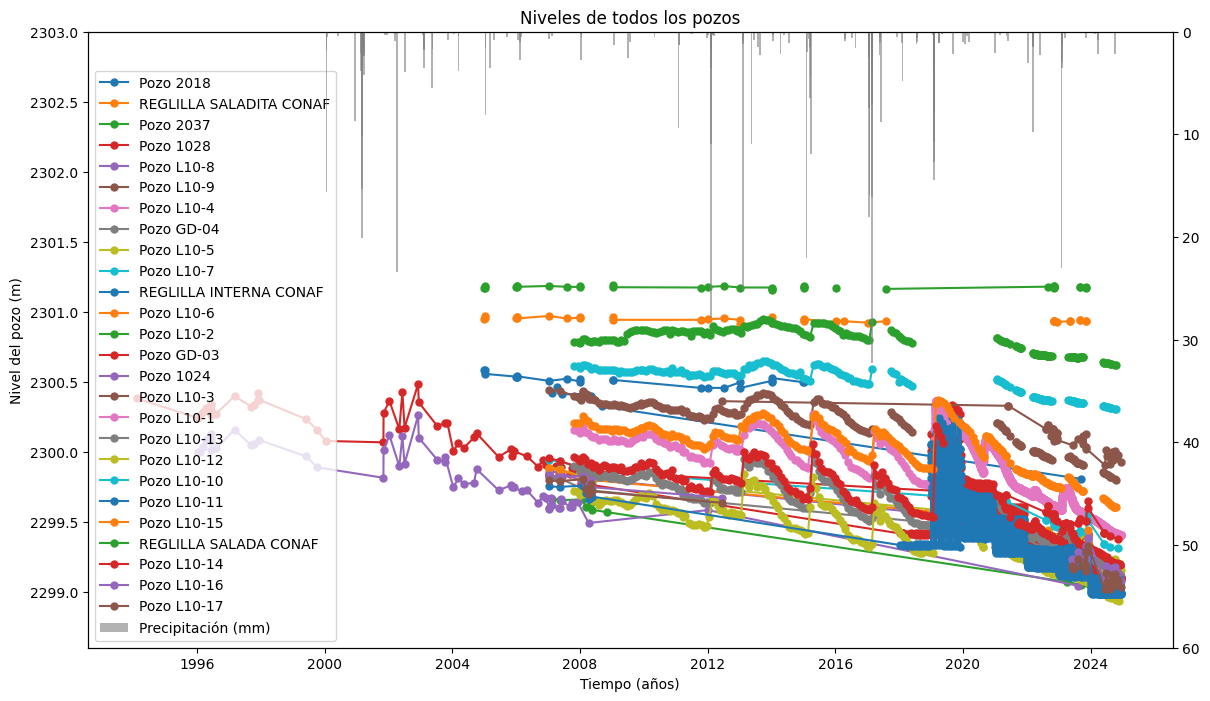

                  Bore Name  Statistic (Z)  Statistic (S)  \
0                 Pozo 2018     -14.124830       -17342.0   
1   REGLILLA SALADITA CONAF      -4.037200        -1273.0   
2                 Pozo 2037     -12.966392       -15720.0   
3                 Pozo 1028     -32.217602     -1497884.0   
4                Pozo L10-8      -7.506201        -7104.0   
5                Pozo L10-9     -16.376724       -15614.0   
6                Pozo L10-4     -62.820168     -2682946.0   
7                Pozo GD-04      -7.014859        -6540.0   
8                Pozo L10-5      -9.545691       -13533.0   
9                Pozo L10-7      -6.808858        -6396.0   
10   REGLILLA INTERNA CONAF      -3.303732         -272.0   
11               Pozo L10-6      -6.757713        -6348.0   
12               Pozo L10-2     -10.894800       -10233.0   
13               Pozo GD-03      -5.420763        -5169.0   
14                Pozo 1024     -19.621018       -46454.0   
15               Pozo L1

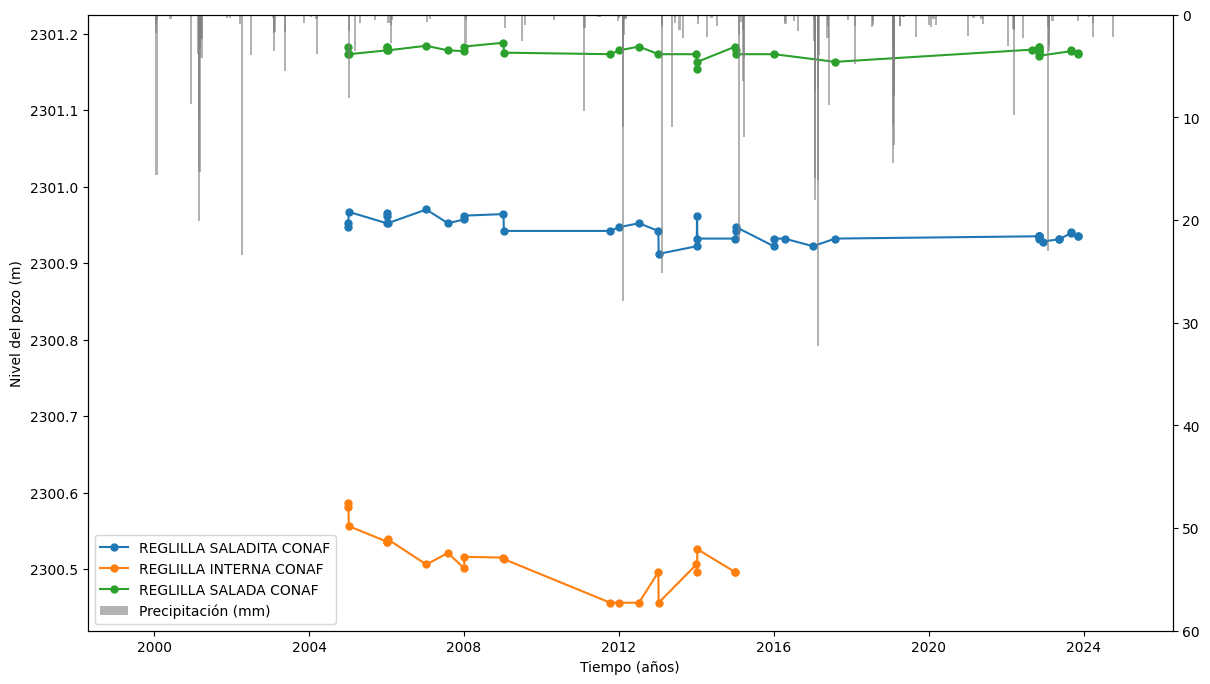

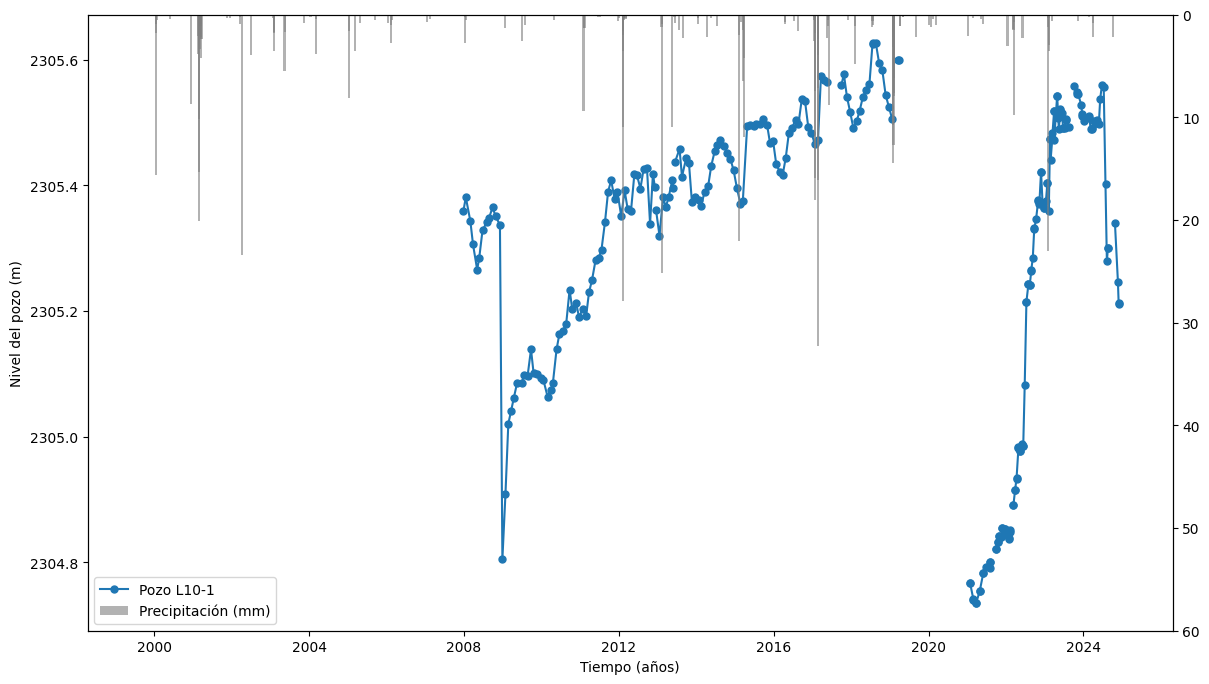

In [98]:

# Leer los datos de nivel de los pozos
datos_pozos = {}

for archivo in os.listdir(carpeta_pozos):
    if archivo.endswith(".csv"):
        nombre_pozo = archivo.split(".")[0]
        ruta_archivo = os.path.join(carpeta_pozos, archivo)
        
        # Leer el archivo CSV y convertirlo en una Series
        datos = pd.read_csv(ruta_archivo, index_col=0, parse_dates=True)
        datos.index = pd.to_datetime(datos.index, errors='coerce')  # Asegurarse de que el índice sea de tipo datetime
        datos_series = datos.squeeze("columns")  # Convertir DataFrame a Series
        if "REGLILLA" in nombre_pozo:
            datos_series = reference_levels[nombre_pozo] - datos_series # Heads
        else:
            datos_series = reference_levels[nombre_pozo[5:]] - datos_series # Heads
        # datos_series = datos_series - 2300 # Heads above 2300 msnm
        datos_pozos[nombre_pozo] = datos_series 


plt.figure(figsize=(14, 8))

for i, (pozo, datos) in enumerate(datos_pozos.items()):
    if i < 3:
        plt.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)

plt.xlabel('Tiempo (años)')
plt.ylabel('Nivel del pozo (m)')
plt.title('Niveles de los tres primeros pozos')
plt.legend()
plt.grid(True)
plt.show()

pp =pd.read_csv(os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), index_col=0, parse_dates=True)#, format='%d/%m/%Y')
pp.index = pd.to_datetime(pp.index, format='%d/%m/%Y')
pp = pp.squeeze("columns")
pp = pp.resample('D').sum()
# pp = pp.resample('M').sum()
print("**********")
print(pp)

results = []

# Graficar los datos de todos los pozos
fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if True:#pozo != "Pozo REGLILLA SALADITA CONAF" and pozo != "Pozo REGLILLA SALADA CONAF" and pozo != "Pozo REGLILLA INTERNA CONAF" and pozo != "Pozo L10-1" and pozo != "Pozo L10-11" and pozo != "Pozo 1028" and pozo != "Pozo 1024":
        datos.sort_index(inplace=True)
        datos.resample('D').mean()
        trend_test = mk.original_test(datos)
        trend = "Increasing" if trend_test.trend == "increasing" else "Decreasing" if trend_test.trend == "decreasing" else "Stable"
        # S = trend_test.s
        # Z = trend_test.z
        # p_value = trend_test.p
        # trend = trend_test.trend  # 'increasing', 'decreasing', or 'no trend'
        results.append([pozo, trend_test.z, trend_test.s, trend_test.p, trend])
        

        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

results_df = pd.DataFrame(results, columns=["Bore Name", "Statistic (Z)","Statistic (S)","Statistic (p-value)", "Trend"])
results_df.to_csv("results.csv", index=False)
print(results_df)

fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA SALADA CONAF" or pozo == "REGLILLA INTERNA CONAF":
        datos.dropna(inplace=True)
        datos.sort_index(inplace=True)
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
# ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
# plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo == "Pozo L10-1":# or pozo == "Pozo L10-11" or pozo == "Pozo 1028" or pozo == "Pozo 1024":
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
# ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
# plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

Datos de precipitación:
Fecha
01/01/2000    0.0
01/01/2001    0.0
01/01/2003    0.0
01/01/2004    0.0
01/01/2005    0.0
Name: Precipitación, dtype: float64

Datos de evaporación:
Fecha
01/01/2000    10.60
01/01/2001     8.20
01/01/2003    12.90
01/01/2004    12.20
01/01/2005    10.63
Name: Evaporación, dtype: float64


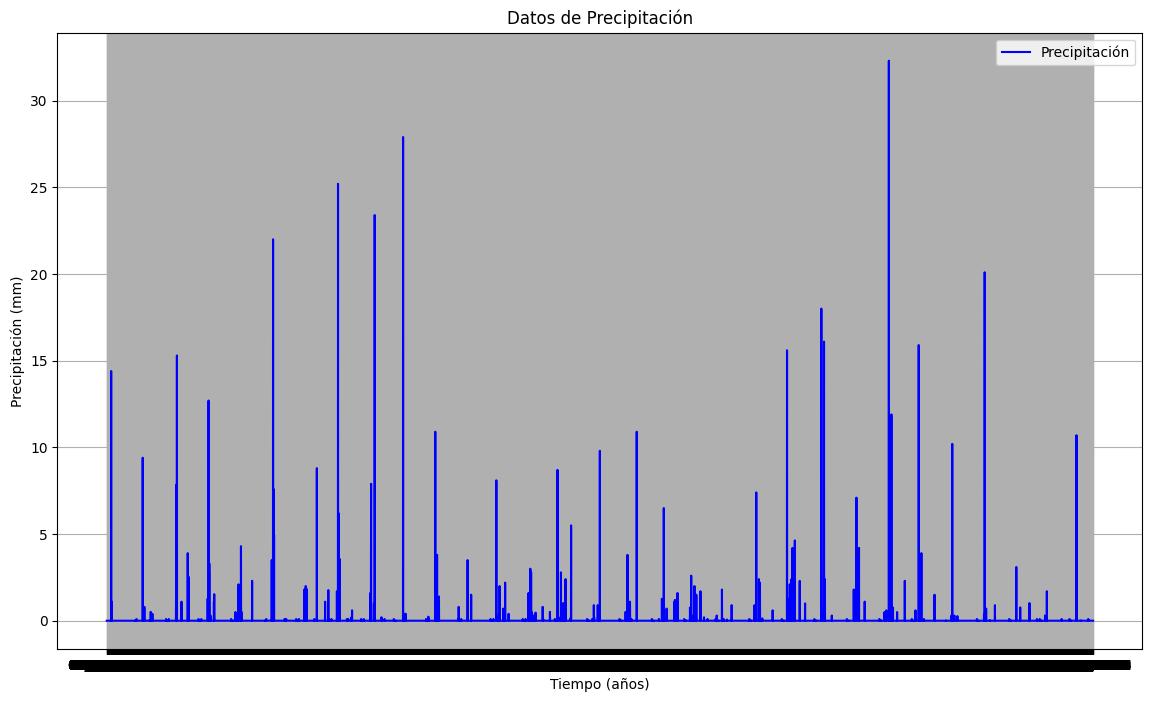

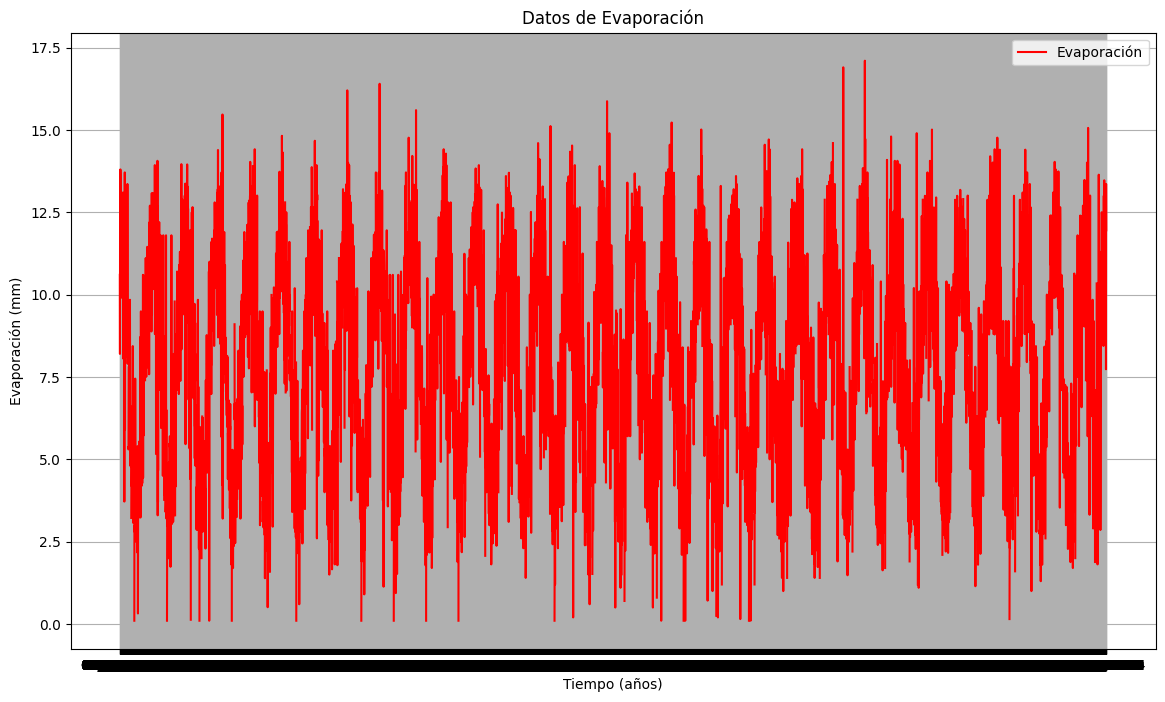

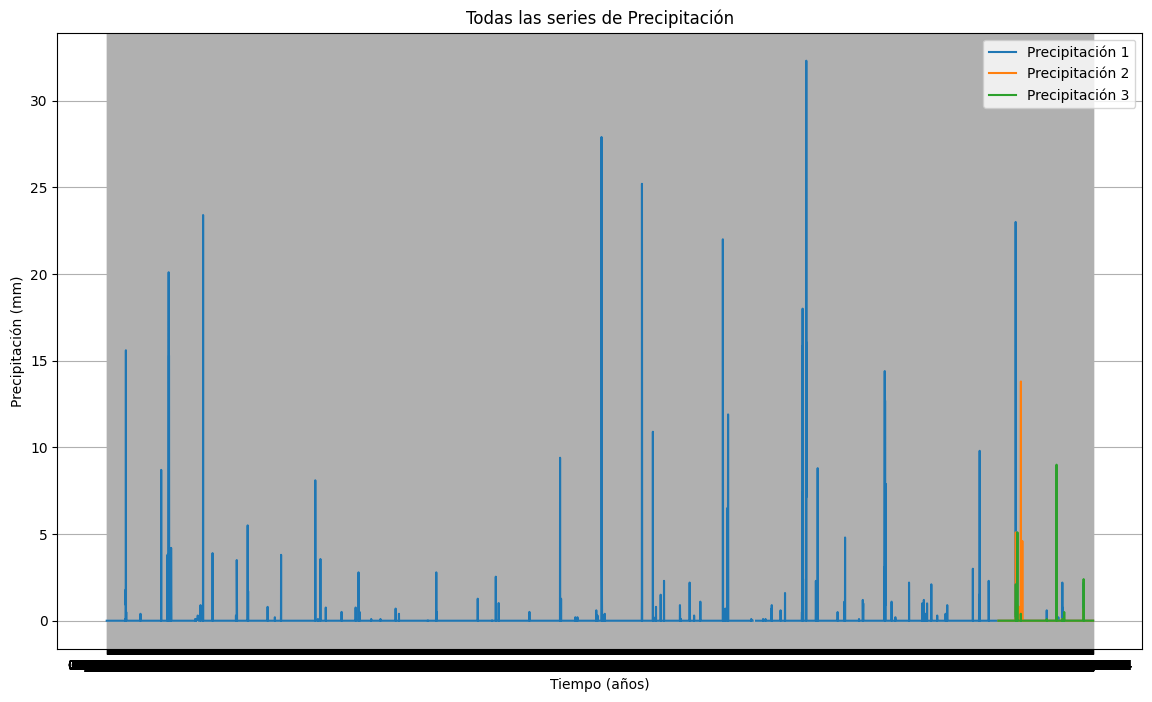

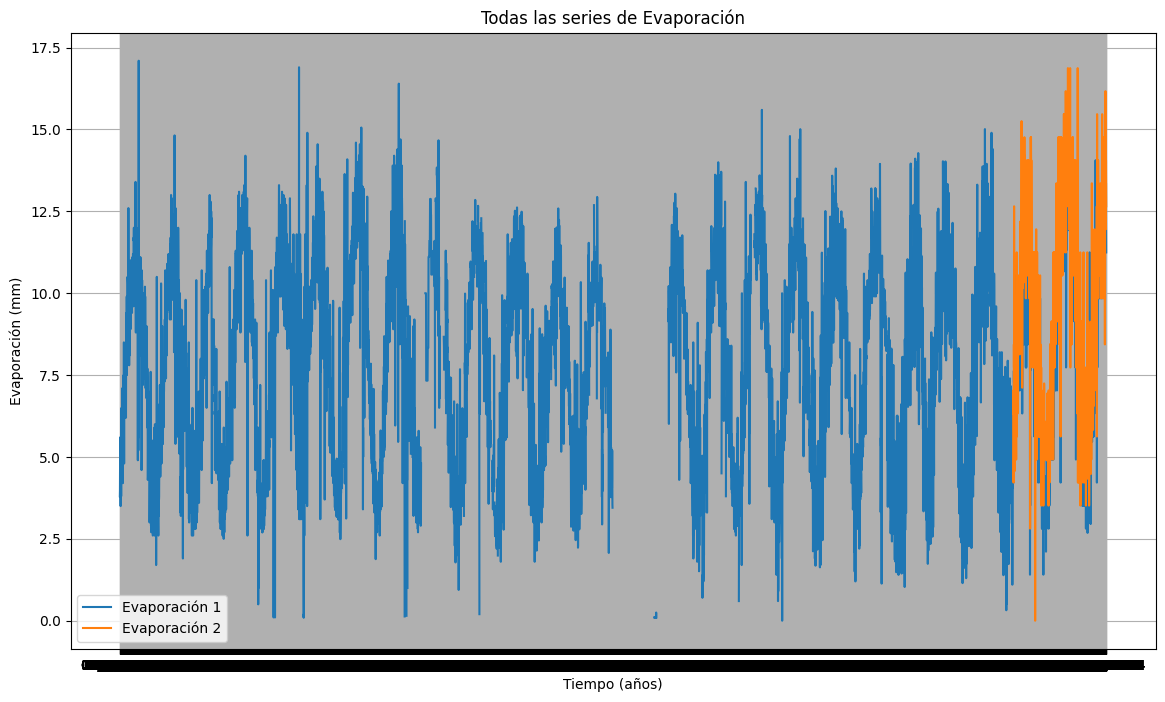

In [99]:
# --- Paso 2: Leer datos de estrés ---
# Leer y concatenar datos de precipitación
precipitacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_precipitacion]
precipitacion = pd.concat(precipitacion_list).groupby(level=0).mean()

# Leer y concatenar datos de evaporación
evaporacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_evaporacion]
evaporacion = pd.concat(evaporacion_list).groupby(level=0).mean()

# Verificar que los datos se han leído correctamente
print("Datos de precipitación:")
print(precipitacion.head())
print("\nDatos de evaporación:")
print(evaporacion.head())


# Graficar los datos de estrés (precipitación y evaporación) por separado

# Graficar datos de precipitación
plt.figure(figsize=(14, 8))
plt.plot(precipitacion.index, precipitacion.values, label='Precipitación', color='blue', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Datos de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar datos de evaporación
plt.figure(figsize=(14, 8))
plt.plot(evaporacion.index, evaporacion.values, label='Evaporación', color='red', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Datos de Evaporación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de precipitación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(precipitacion_list):
    plt.plot(serie.index, serie.values, label=f'Precipitación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Todas las series de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de evaporación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(evaporacion_list):
    plt.plot(serie.index, serie.values, label=f'Evaporación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Todas las series de Evaporación')
plt.legend()
plt.grid(True)
plt.show()


            MPW-1  MPW-10  MPW-11  MPW-12  MPW-13  MPW-14  MPW-15  MPW-16  \
fecha                                                                       
1995-05-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-06-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-07-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-08-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-09-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2022-04-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-05-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-06-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-07-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-08-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.

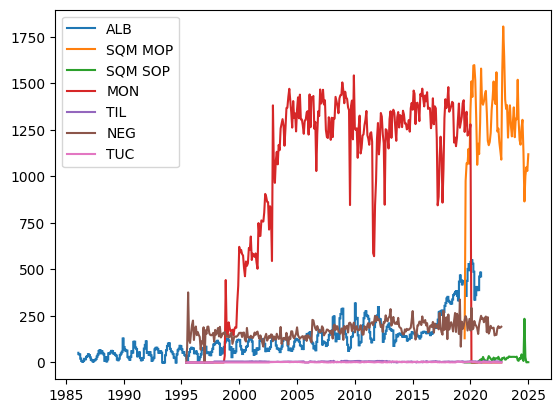

In [100]:
ALB = pd.read_csv(os.path.join("datos","pumping","ALB_pumping.csv"))
ALB["date"] = pd.to_datetime(ALB["DATE"], format="%Y-%m-%d")
ALB.set_index("date", inplace=True)

SQM = pd.read_csv(os.path.join("datos","pumping","SQM_pumping.csv"))
SQM["date"] = pd.to_datetime(SQM["Fecha final"], format="%Y-%m-%d")
SQM.set_index("date", inplace=True)

MON = pd.read_csv(os.path.join("datos","pumping","Monturaqui_pumping.csv"))
MON["fecha"] = pd.to_datetime(MON["fecha"], format="%d/%m/%Y")
MON.set_index("fecha", inplace=True)
print(MON)
MON['Total'] = MON.sum(axis=1)*-1
print(MON)

TIL = pd.read_csv(os.path.join("datos","pumping","tilopozo_pumping.csv"))
TIL["fecha"] = pd.to_datetime(TIL["fecha"], format="%d/%m/%Y")
TIL.set_index("fecha", inplace=True)
TIL['Total'] = TIL.sum(axis=1)*-1

NEG = pd.read_csv(os.path.join("datos","pumping","negrillar_pumping.csv"))
NEG["fecha"] = pd.to_datetime(NEG["fecha"], format="%d/%m/%Y")
NEG.set_index("fecha", inplace=True)
NEG['Total'] = NEG.sum(axis=1)*-1

TUC = pd.read_csv(os.path.join("datos","pumping","tucucaro_pumping.csv"))
TUC["fecha"] = pd.to_datetime(TUC["fecha"], format="%d/%m/%Y")
TUC.set_index("fecha", inplace=True)
TUC['Total'] = TUC.sum(axis=1)*-1

SQM_mop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo mop","merged_output_mop.csv"))
SQM_mop["date"] = pd.to_datetime(SQM_mop["Fecha final"], format="%Y-%m-%d")
SQM_mop.set_index("date", inplace=True)


SQM_sop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo sop","merged_output_sop.csv"))
SQM_sop["date"] = pd.to_datetime(SQM_sop["Fecha final"], format="%Y-%m-%d")
SQM_sop.set_index("date", inplace=True)


# print(SQM)


selected_column = "Grand Total"  # Change this to your desired column name
sub_df = ALB[[selected_column]]

selected_column2 = "Total"  # Change this to your desired column name
sub_df2 = SQM[[selected_column2]]

sub_df3 = SQM_mop[["Total"]]
sub_df4 = SQM_sop[["Total"]]

sub_df5 = MON[["Total"]]
sub_df6 = TIL[["Total"]]
sub_df7 = NEG[["Total"]]
sub_df8 = TUC[["Total"]]

# for column in sub_df.columns:
#     plt.plot(ALB.index, ALB[column])
    
wel_alb = sub_df.squeeze()
wel_alb = wel_alb.asfreq('D')

wel_sqm = sub_df2.squeeze()
wel_sqm = wel_sqm.asfreq('M')

wel_sqm_mop = sub_df3.squeeze()
wel_sqm_op = wel_sqm_mop.asfreq('M')

wel_sqm_sop = sub_df4.squeeze()
wel_sqm_sop = wel_sqm_sop.asfreq('M')

wel_mon = sub_df5.squeeze()
wel_mon = wel_mon.asfreq('M')

wel_til = sub_df6.squeeze()
wel_til = wel_til.asfreq('M')

wel_neg = sub_df7.squeeze()
wel_neg = wel_neg.asfreq('M')

wel_tuc = sub_df8.squeeze()
wel_tuc = wel_tuc.asfreq('M')

print(wel_sqm)

# plt.plot(wel_sqm.index,wel_sqm.values)
plt.plot(wel_alb.index,wel_alb.values/86.4)
plt.plot(wel_sqm_mop.index,wel_sqm_mop.values)
plt.plot(wel_sqm_sop.index,wel_sqm_sop.values)
plt.plot(wel_mon.index,wel_mon.values/86.4)
plt.plot(wel_til.index,wel_til.values/86.4)
plt.plot(wel_neg.index,wel_neg.values/86.4)
plt.plot(wel_tuc.index,wel_tuc.values/86.4)
plt.legend(["ALB","SQM MOP","SQM SOP","MON","TIL","NEG","TUC"])
plt.show()

# for column in sub_df.columns:
#     plt.plot(wel.index, wel[column])

7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    55                     EVP        54.30
nobs    36                     R2          0.54
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -315.16
tmax    2023-11-08 00:00:00    BIC      -308.07
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (7 optimized)
                     optimal      initial  vary
precipitacion_A     8.196162    15.865711  True
precipitacion_n     4.889286     1.000000  True
precipitacion_a   132.212293    10.000000  True
evaporacion_A       0.045114     0.349518  True
evaporacion_n       2.140307     1.000000  True
evaporacion_a     507.074519    10.000000  True
constant_d       2300.487647  2300.943111  True
Fit report Pozo L10-4 Recarga     Fit Statistics
nfev    82                     EVP         65.79
nobs    2345                   R2           0.66
noise  

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

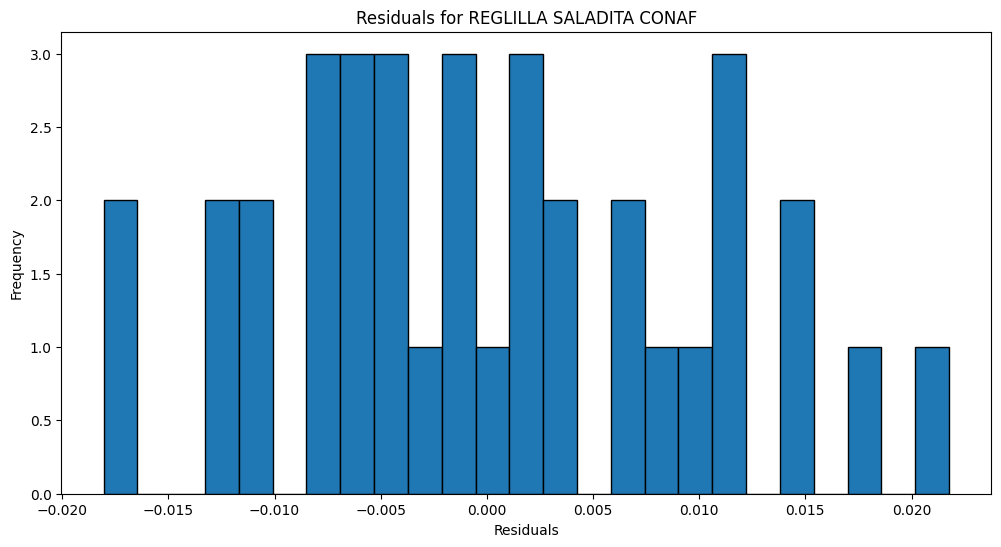

<Figure size 1200x600 with 0 Axes>

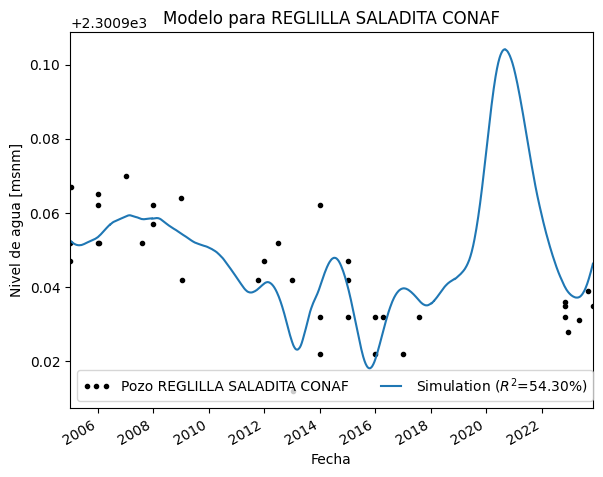

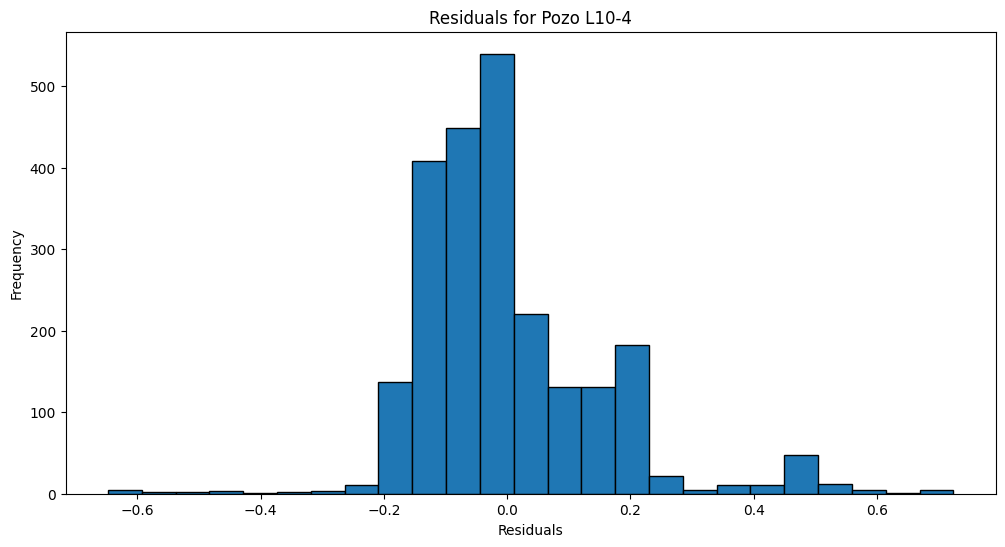

<Figure size 1200x600 with 0 Axes>

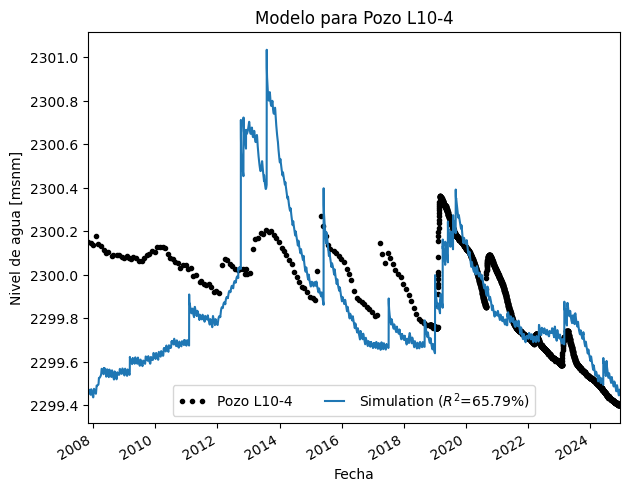

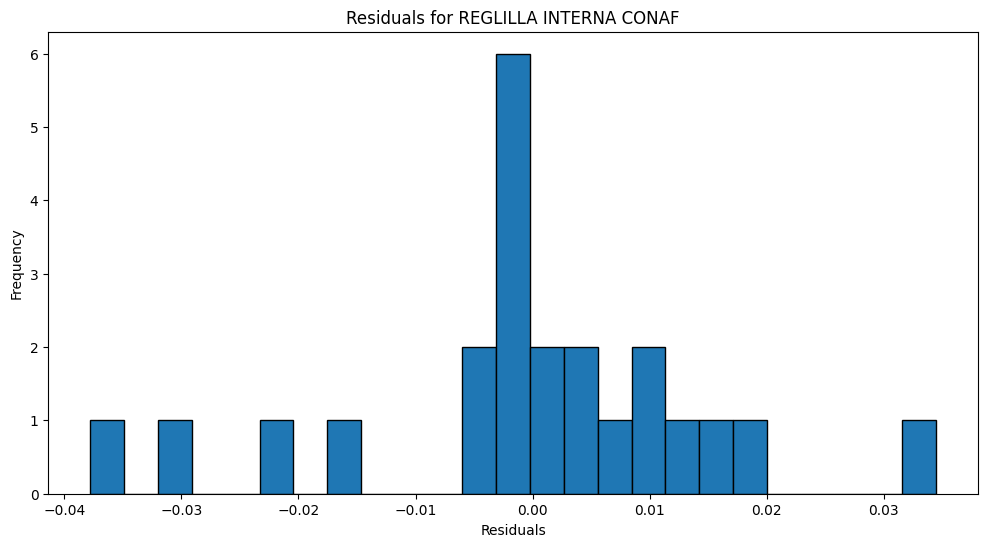

<Figure size 1200x600 with 0 Axes>

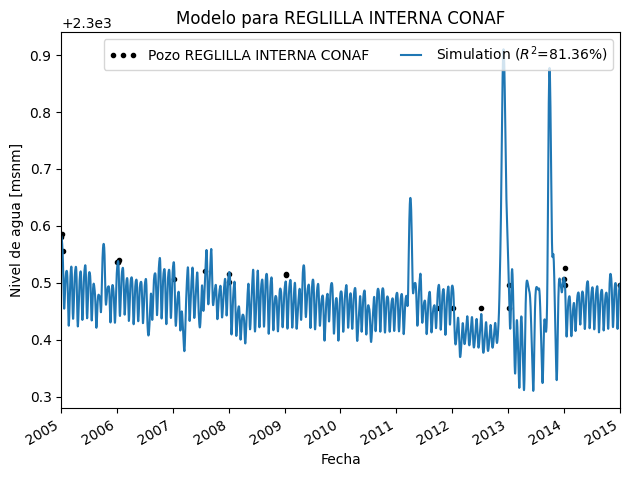

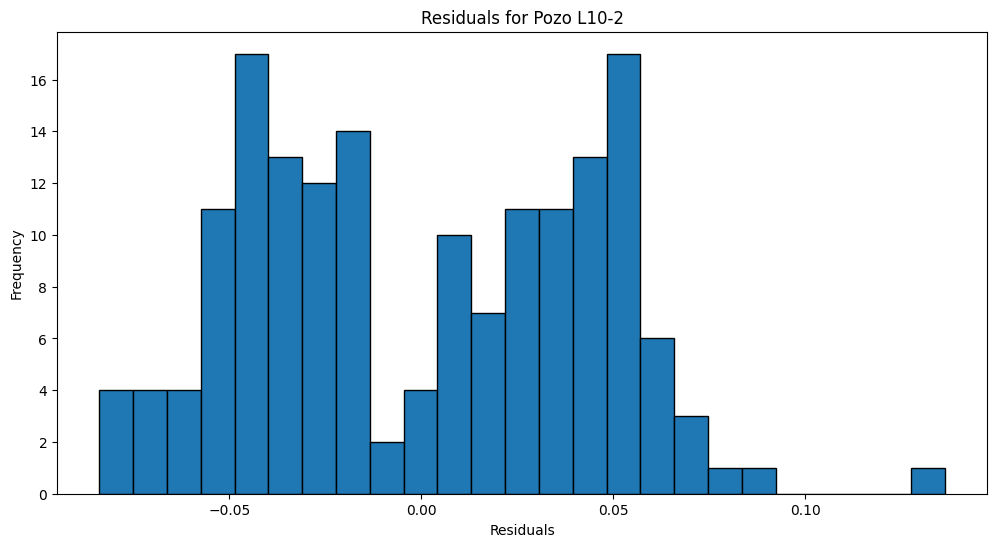

<Figure size 1200x600 with 0 Axes>

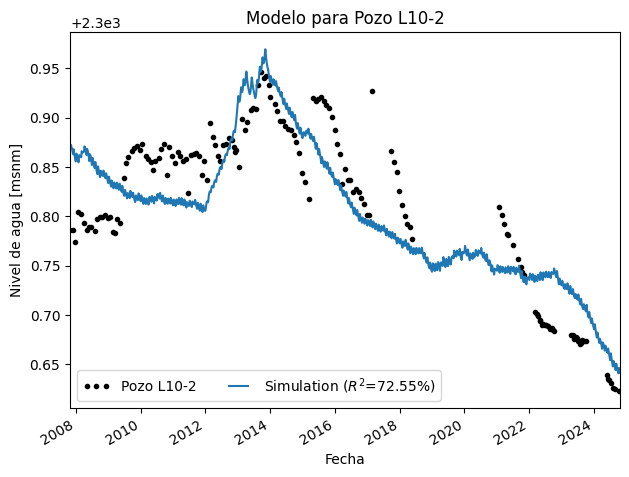

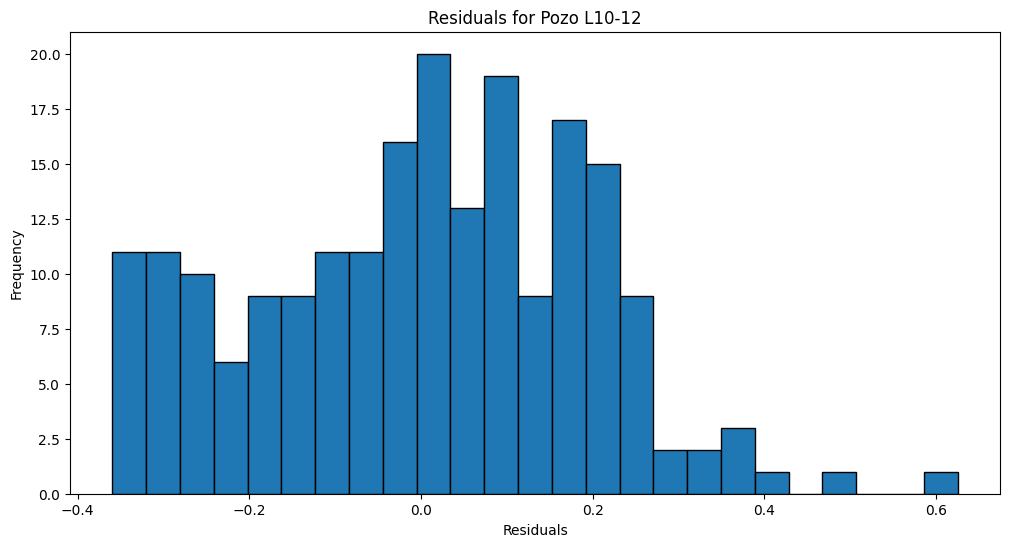

<Figure size 1200x600 with 0 Axes>

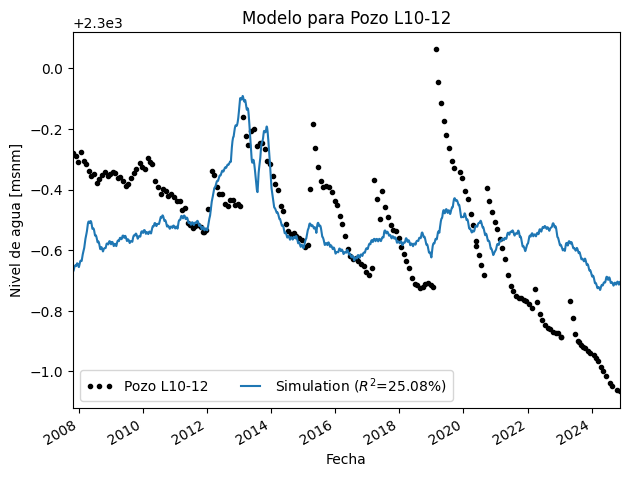

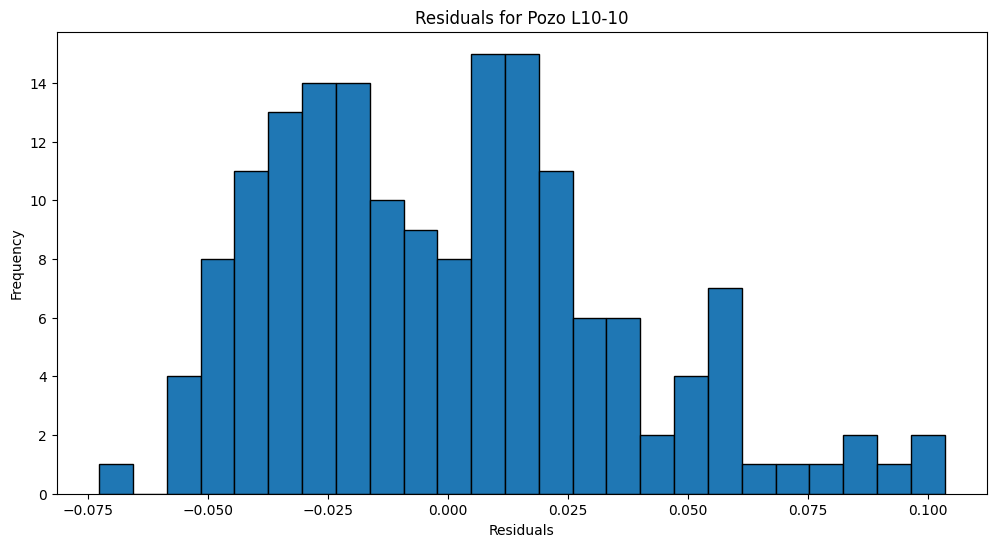

<Figure size 1200x600 with 0 Axes>

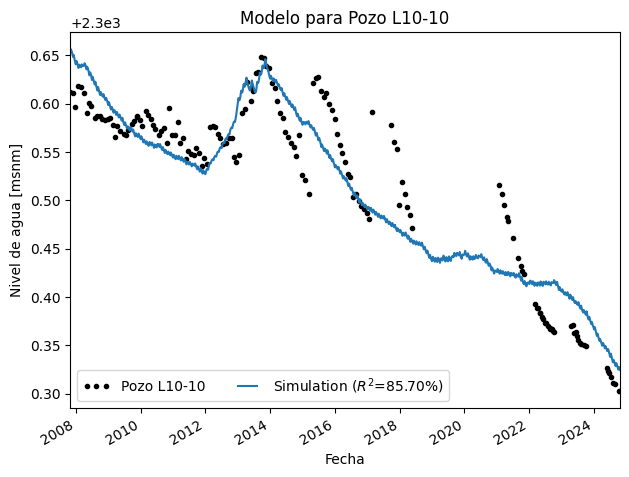

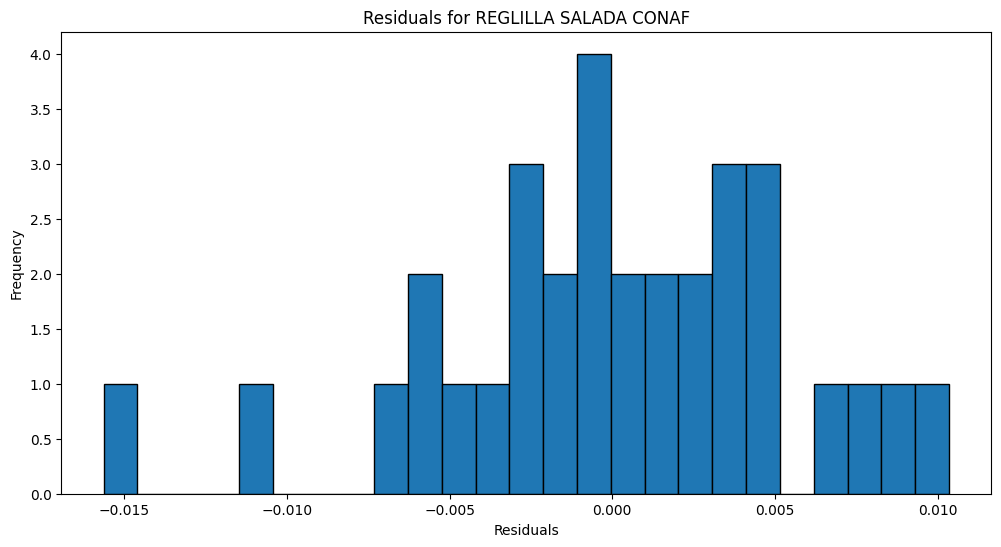

<Figure size 1200x600 with 0 Axes>

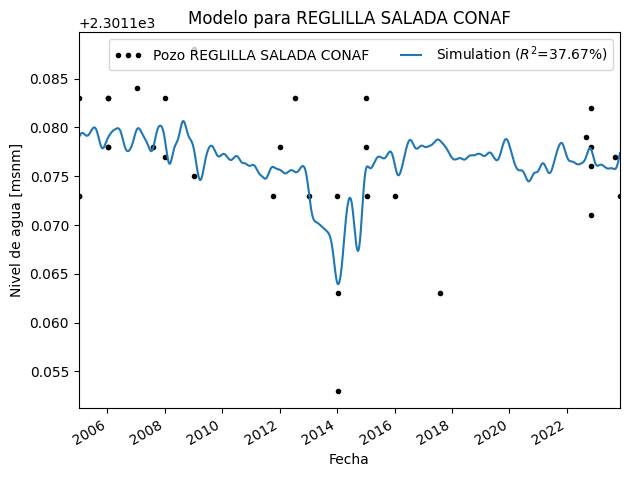

In [115]:

#### Modelo A: Solo Recarga



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_A"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_A.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


In [ ]:

#### Modelo B: Recarga + Albemarle



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_B"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_B.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3


7
3
Fecha
2007-10-29    2300.152
2007-12-05    2300.147
2007-12-26    2300.135
2008-01-31    2300.179
2008-03-02    2300.143
                ...   
2024-12-11    2299.403
2024-12-12    2299.403
2024-12-13    2299.402
2024-12-14    2299.402
2024-12-15    2299.402
Name: Pozo L10-4, Length: 2355, dtype: float64
Fit report Pozo L10-4             Fit Statistics
nfev    39                     EVP         54.05
nobs    2345                   R2           0.54
noise   False                  RMSE         0.17
tmin    2007-10-29 00:00:00    AICc     -8167.96
tmax    2024-12-15 00:00:00    BIC      -8127.69
freq    D                      Obj         35.79
warmup  3650 days 00:00:00     ___              
solver  LeastSquares           Interp.        No

Parameters (7 optimized)
                     optimal      initial  vary
precipitacion_A    93.346824    15.865711  True
precipitacion_n     0.960326     1.000000  True
precipitacion_a   630.225743    10.000000  True
evaporacion_A       0.000010   

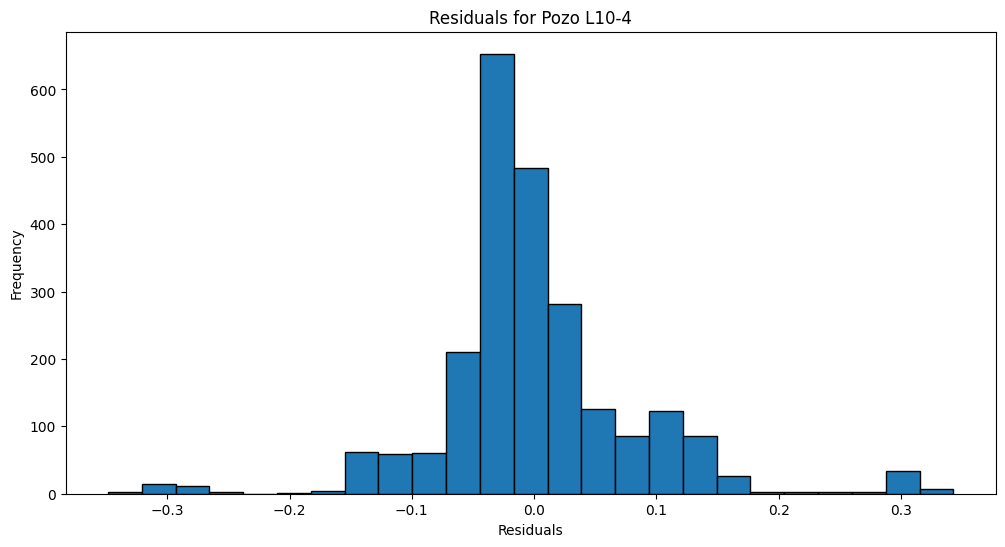

<Figure size 1200x600 with 0 Axes>

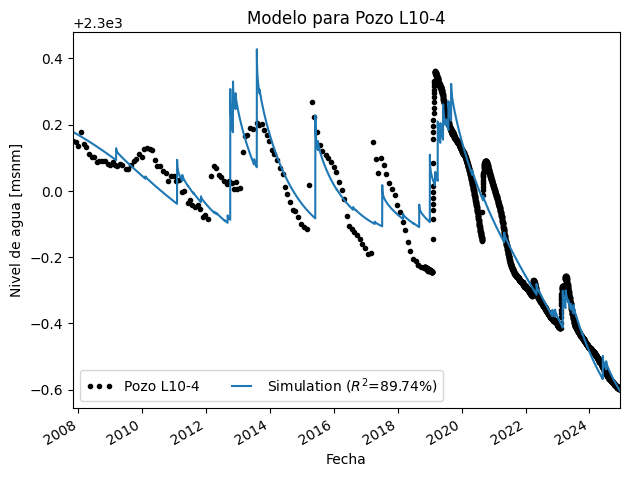

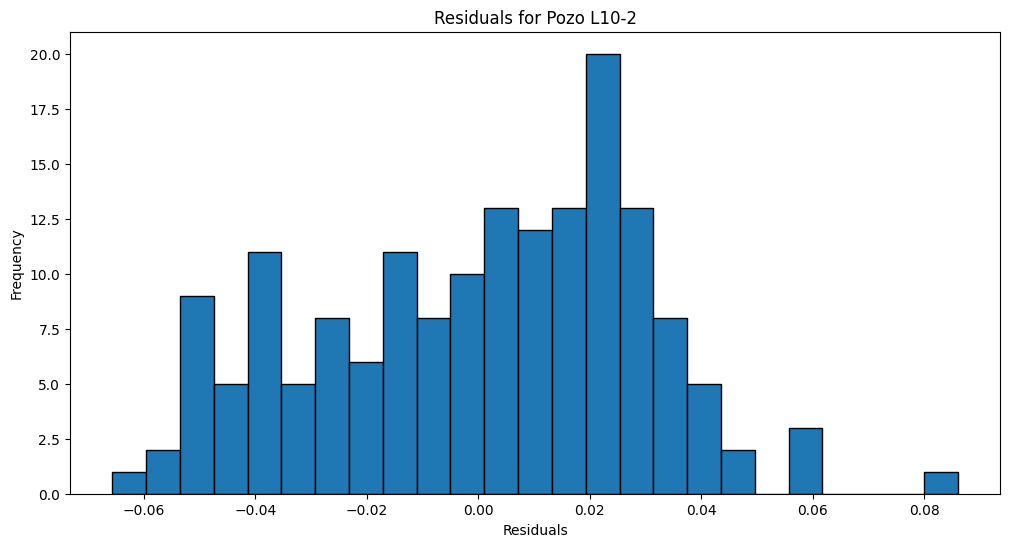

<Figure size 1200x600 with 0 Axes>

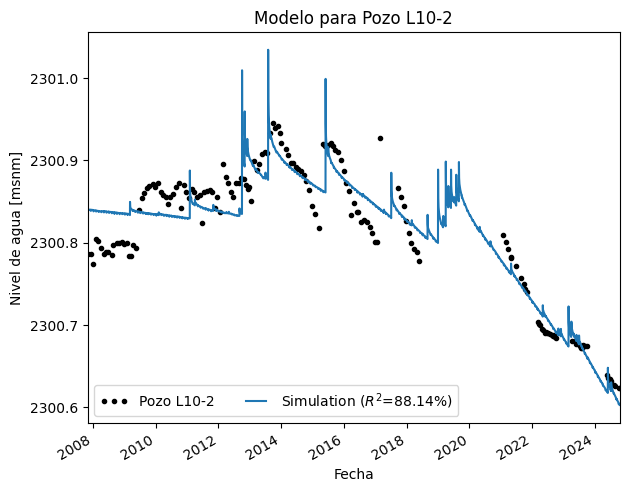

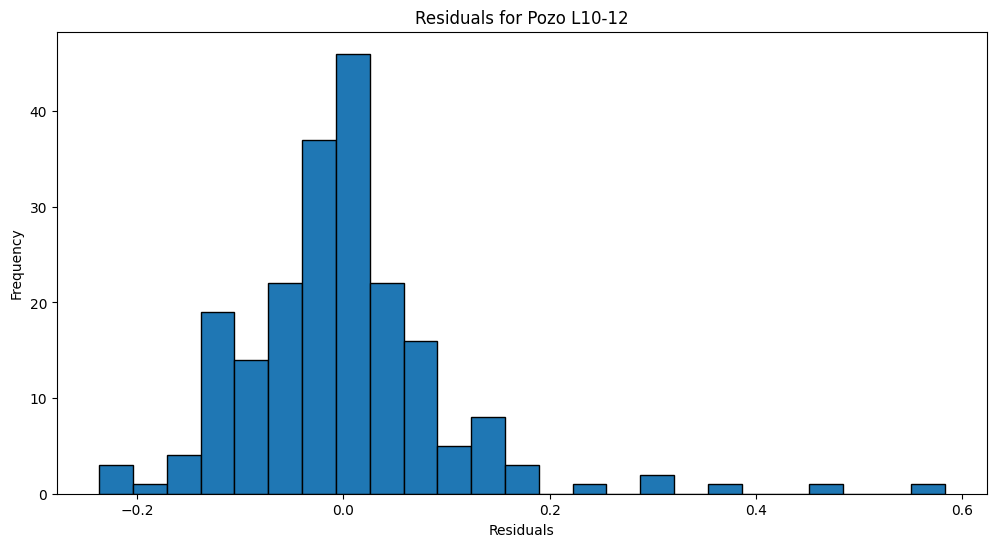

<Figure size 1200x600 with 0 Axes>

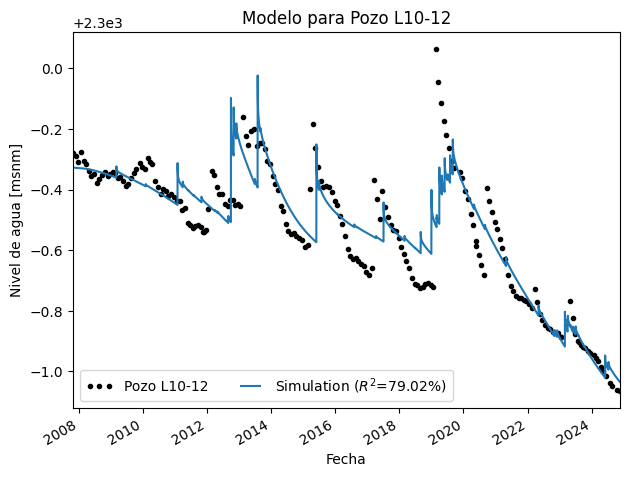

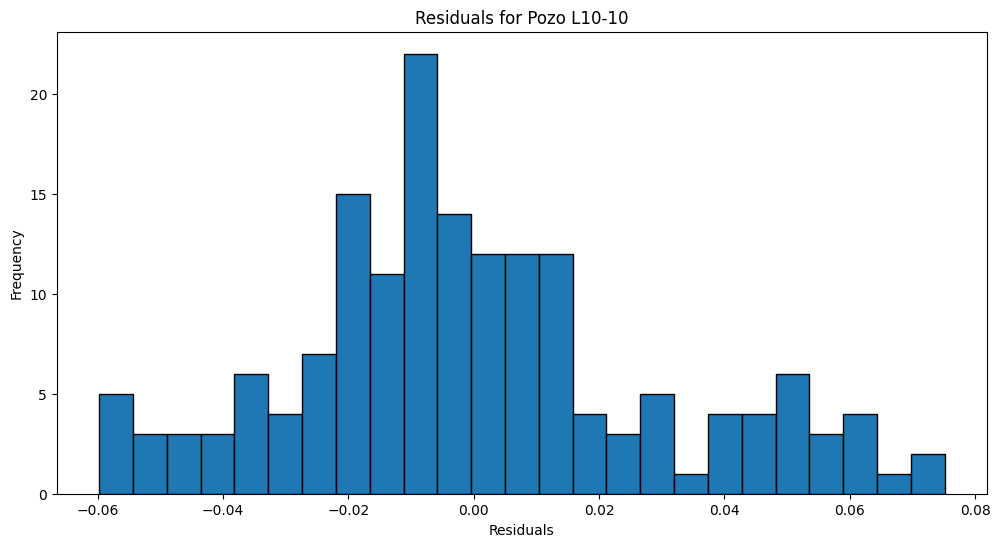

<Figure size 1200x600 with 0 Axes>

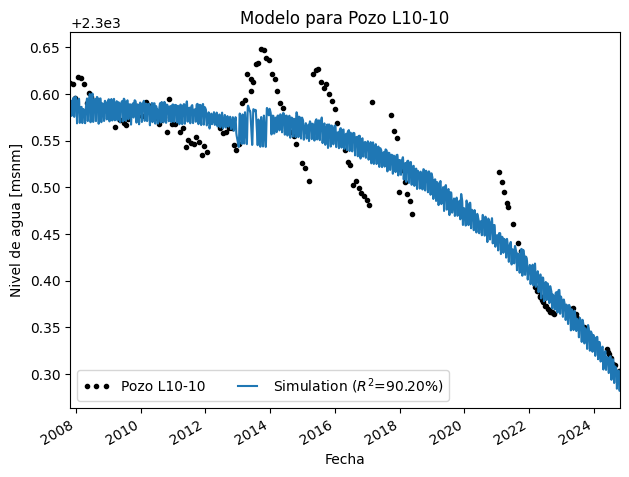

In [114]:
#### Modelo D: Extraccion Escondida



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "Pozo REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "Pozo REGLILLA SALADITA CONAF" or pozo == "Pozo REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        print(datos)
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        if "REGLILLA" in pozo:
            name = pozo[5:]
            
        name = pozo
        ml = ps.Model(datos, name=name)
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "Pozo REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        ml.add_stressmodel(sm_precip)
        ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)
        ml2 = ml.copy(name=pozo+" Modelo D")
        ml.solve()
        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        ml.add_stressmodel(sm_mon)
        ml2.add_stressmodel(sm_til)
        ml.add_stressmodel(sm_neg)
        ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        ml.solve()

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()

        c = ml.get_contributions()
        print(c)
        
        report = ml.fit_report()
        print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_E"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_E.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


Fit report Pozo REGLILLA SALADIT Fit Statistics
nfev    70                     EVP        54.30
nobs    36                     R2          0.54
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -315.16
tmax    2023-11-08 00:00:00    BIC      -308.08
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (7 optimized)
                     optimal      initial  vary
precipitacion_A   807.971383  1586.571122  True
precipitacion_n     4.953427     1.000000  True
precipitacion_a   130.095633    10.000000  True
evaporacion_A       0.044725     0.349518  True
evaporacion_n       2.132824     1.000000  True
evaporacion_a     507.901767    10.000000  True
constant_d       2300.491735  2300.943111  True
Fit report Pozo REGLILLA SALADIT Fit Statistics
nfev    69                     EVP        60.16
nobs    36                     R2          0.60
noise   False 

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

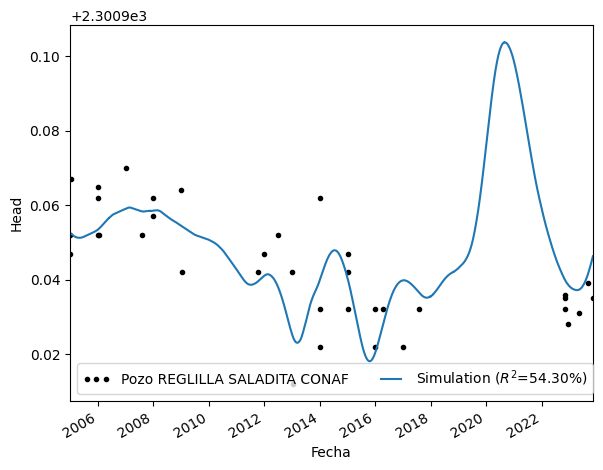

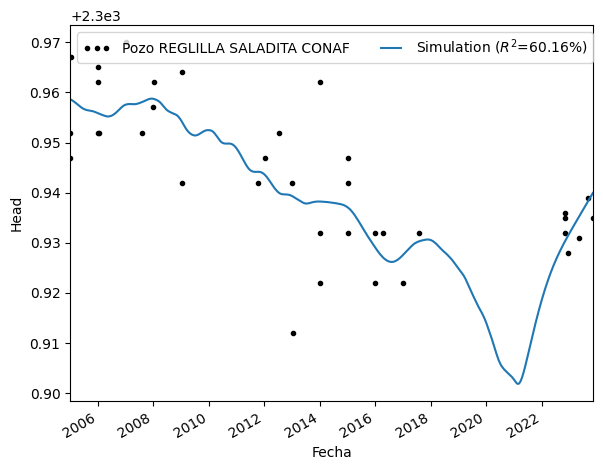

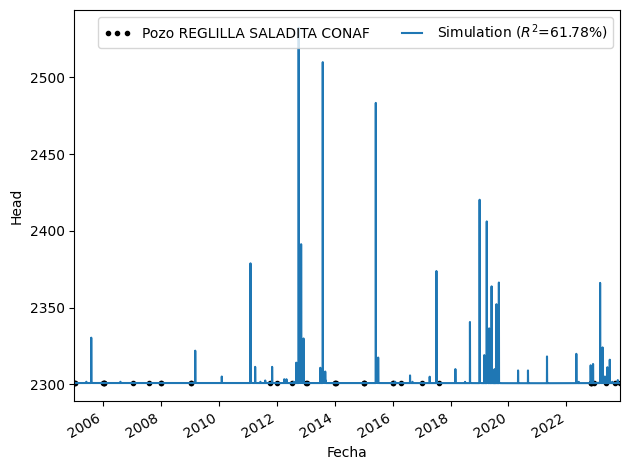

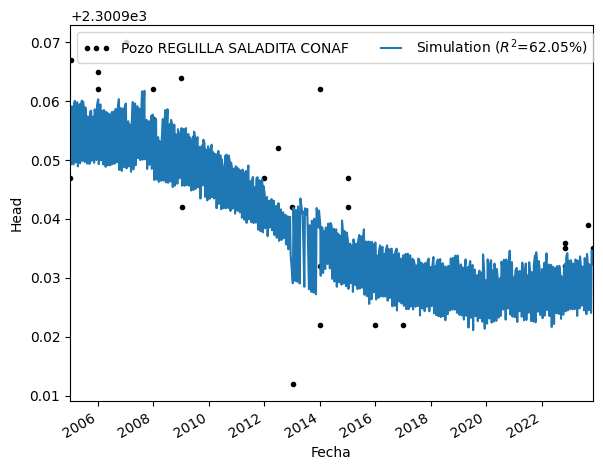

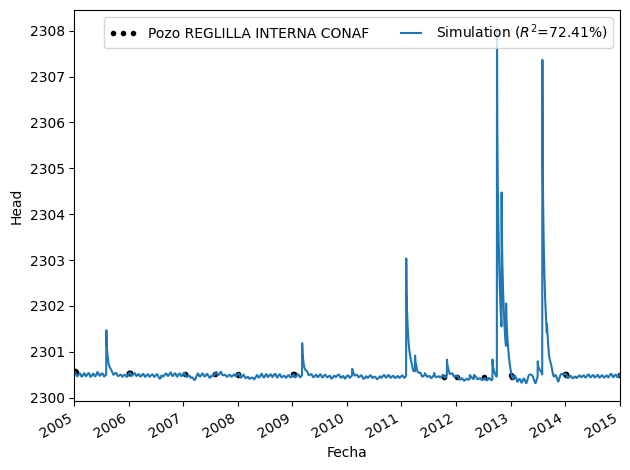

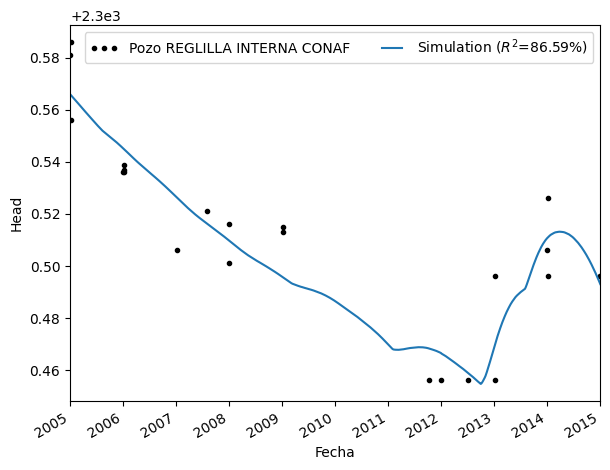

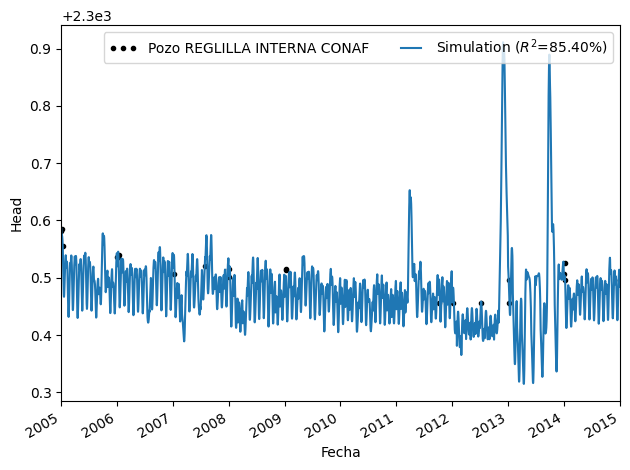

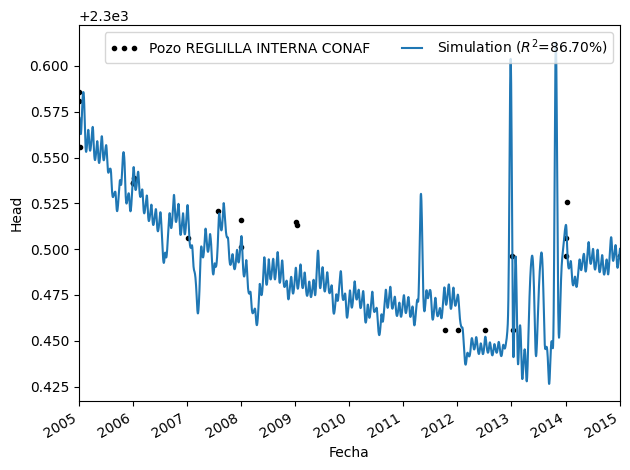

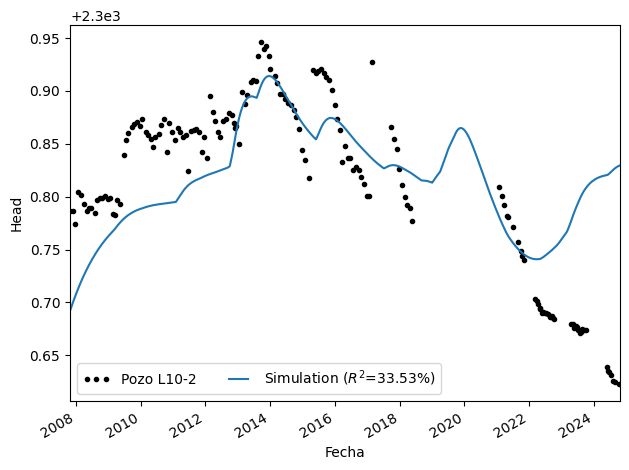

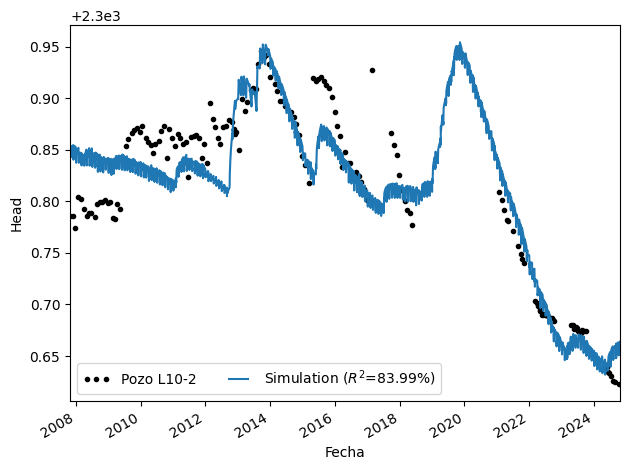

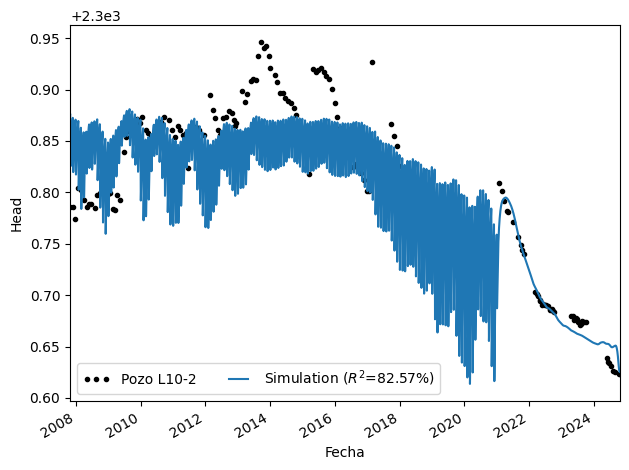

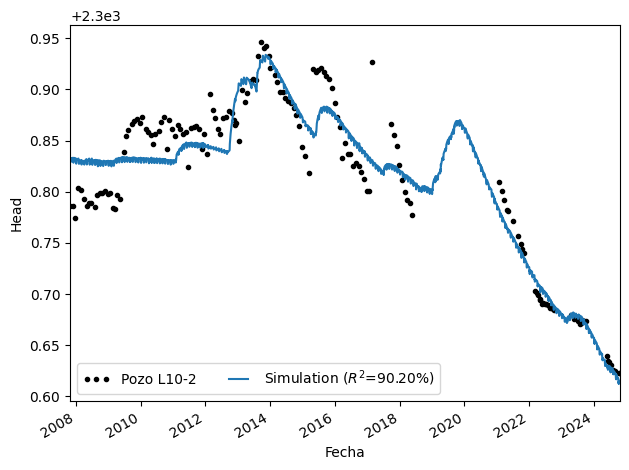

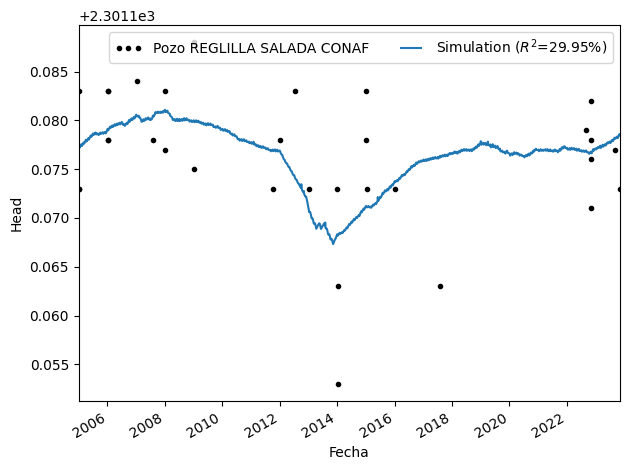

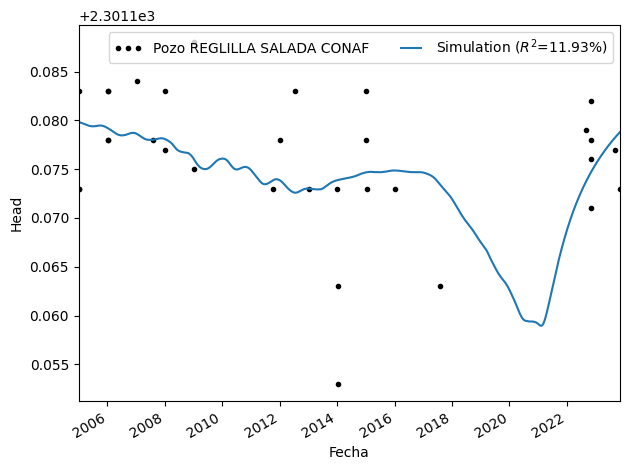

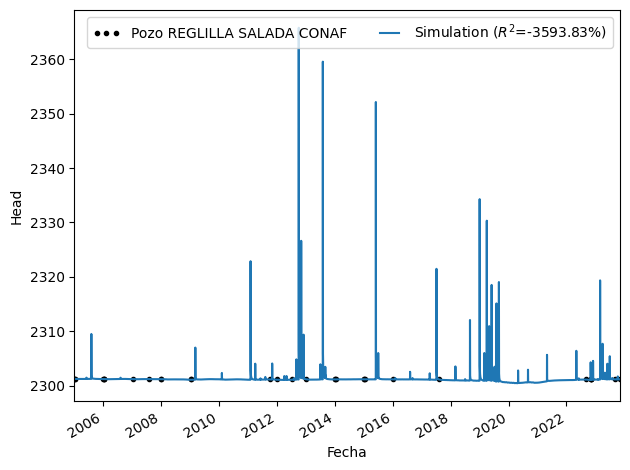

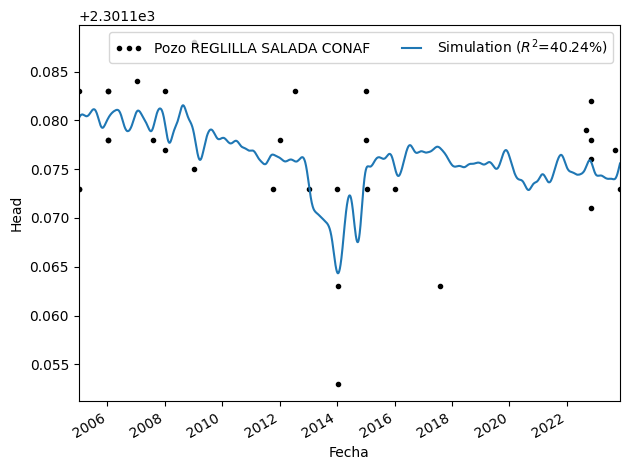

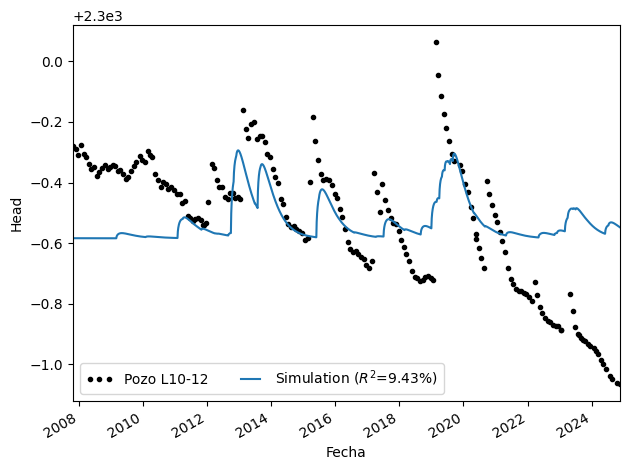

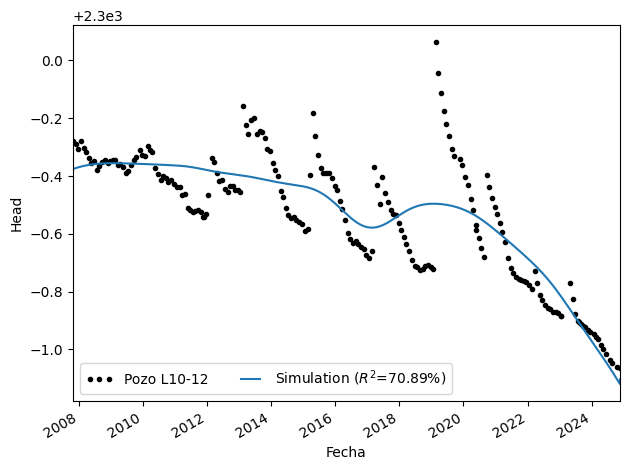

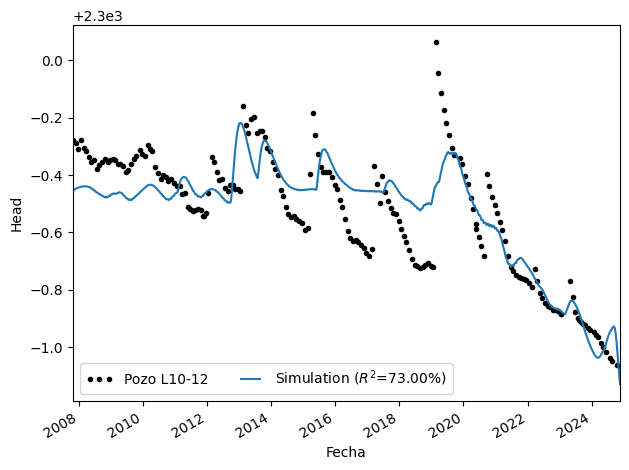

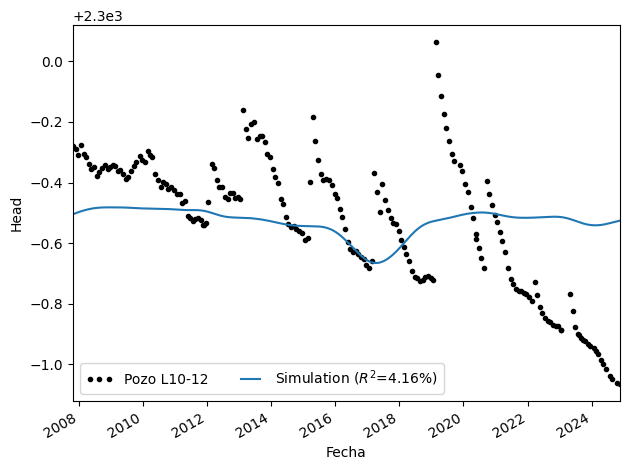

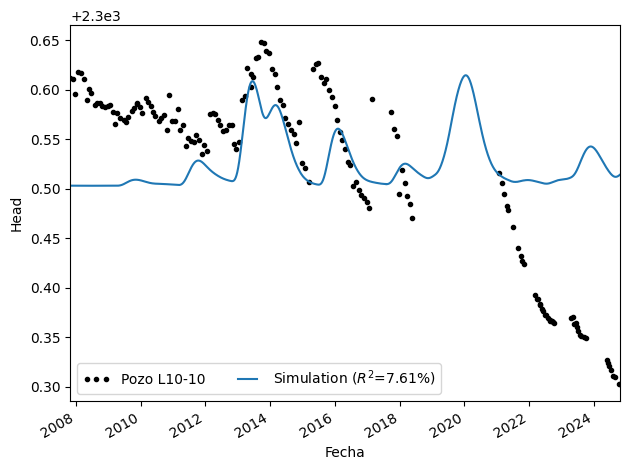

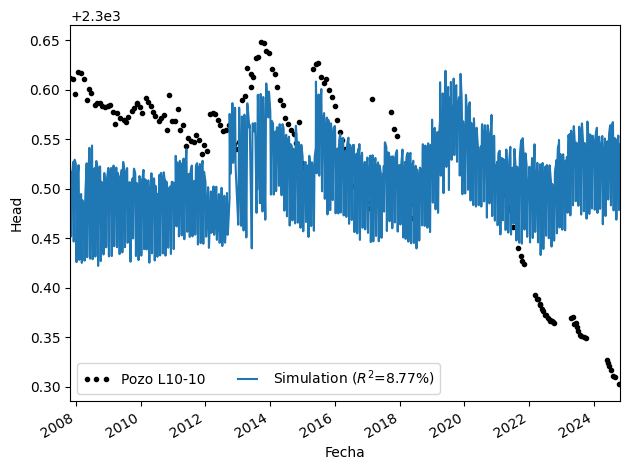

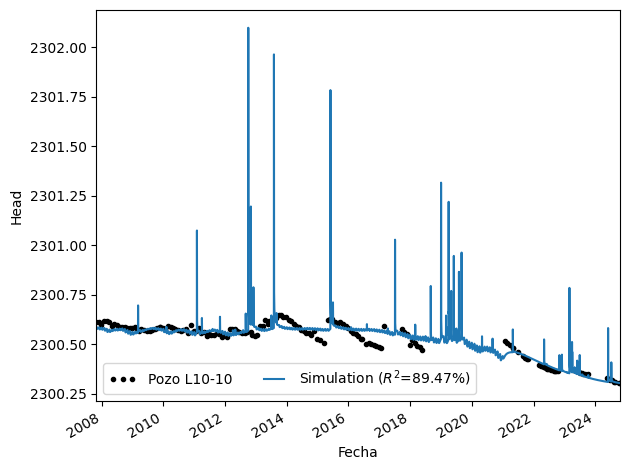

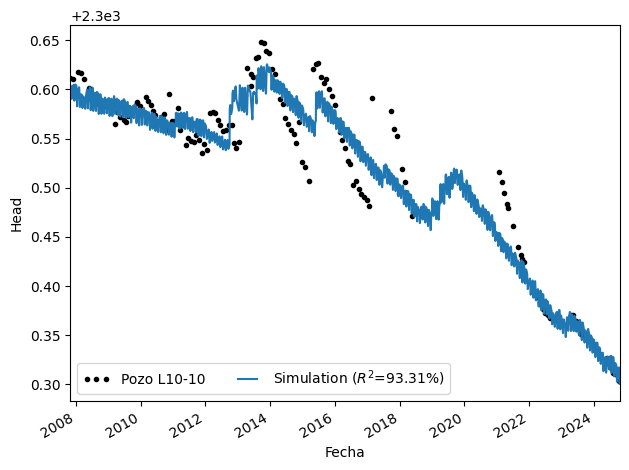

In [ ]:


# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')

# Lista de pozos a modelar
pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]

# Definir extracciones de pozos
list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc / 86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
dis = [16000, 25000, 28000, 16000, 16000, 43000, 63000]
list_wel2 = list_wel[0:3]

# Iterar sobre los pozos seleccionados
for pozo, datos in datos_pozos.items():
    if pozo in pozos_a_modelar:
        
        # Preparar datos
        # datos = datos.dropna().loc[~datos.index.duplicated(keep='first')].sort_index()
        datos = datos.loc[datos.index.dropna()]
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear modelo Pastas
        ml = ps.Model(datos, name=f"{pozo} Recarga")
        
        # Definir stress models comunes a todos los modelos
        sm_precip = ps.StressModel(precipitacion * 0.001, ps.Gamma(), settings="prec", name="precipitacion")
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="Alb", settings="well", up=False)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="sqm_mop", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="sqm_sop", settings="well", up=False)
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)

        # Modelos a ejecutar
        modelos = ["A", "B", "C", "D"]

        for m in modelos:
            ml_copy = ml.copy(name=f"{pozo} Model {m}")

            # Agregar stress models según el modelo
            if m == "A":
                ml_copy.add_stressmodel(sm_precip)
                ml_copy.add_stressmodel(sm_evap)

            elif m == "B":
                ml_copy.add_stressmodel(sm_precip)
                ml_copy.add_stressmodel(sm_evap)
                ml_copy.add_stressmodel(sm_alb)

            elif m == "C":
                ml_copy.add_stressmodel(sm_precip)
                ml_copy.add_stressmodel(sm_evap)
                ml_copy.add_stressmodel(sm_alb)
                ml_copy.add_stressmodel(sm_sqm_mop)
                ml_copy.add_stressmodel(sm_sqm_sop)

            elif m == "D":
                ml_copy.add_stressmodel(sm_precip)
                ml_copy.add_stressmodel(sm_evap)
                ml_copy.add_stressmodel(sm_wel2)

            # Resolver modelo y almacenar estadísticas
            try:
                ml_copy.solve()
                r2 = ml_copy.stats.rsq()
                rmse = ml_copy.stats.rmse()
            except Exception as e:
                print(f"Error al resolver el modelo {m} para {pozo}: {e}")
                r2, rmse = np.nan, np.nan

            # Guardar modelo y estadísticas
            modelos_individuales[f"{pozo}_{m}"] = ml_copy
            model_stats[(pozo, m)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')

# Mostrar resultados
print(df_model_stats)

# Graficar modelos
for modelo in modelos_individuales.values():
    modelo.plot()


In [ ]:
# # --- Paso 5: Crear un modelo conjunto para todos los pozos ---
# mosaic = [
#     ["ose", "ose", "met"],
#     ["sim", "sim", "tab"],
# ]
# mc.initialize_figure(mosaic, figsize=(16, 10), cmap="Dark2")

# mc.plot_oseries(axn="ose")
# mc.plot_simulation()
# _ = ax.legend(loc=(0, 1), frameon=False, ncol=2)


,Pozo REGLILLA SALADA CONAF Recarga,Pozo REGLILLA SALADA CONAF Recarga + Extracciones
rmse,0.005800,0.006504
rmsn,NaN,NaN
sse,0.001077,0.001354
mae,0.004588,0.004773
nse,0.299511,0.119301
evp,29.951114,11.930076
rsq,0.299511,0.119301
kge,0.360924,0.074362
bic,-305.330788,-287.607574
aic,-315.590939,-302.264933


In [ ]:

#### Modelo D: Extraccion SQM



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "Pozo REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "Pozo REGLILLA SALADITA CONAF" or pozo == "Pozo REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "Pozo REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.001, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        ml.add_stressmodel(sm_precip)
        ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)
        ml2 = ml.copy(name=pozo+" Modelo C")
        ml.solve()
        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        ml.add_stressmodel(sm_sqm_mop)
        ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        ml.solve()

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        ml.plot()
        try:
            ml.plots.diagnostics()
        except:
            pass
        c = ml.get_contributions()
        print(c)
        
        report = ml.fit_report()
        print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_E"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_C.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report Pozo L10-4 Recarga     Fit Statistics
nfev    82                     EVP         65.79
nobs    2345                   R2           0.66
noise   False                  RMSE         0.15
tmin    2007-10-29 00:00:00    AICc     -8863.81
tmax    2024-12-15 00:00:00    BIC      -8835.04
freq    D                      Obj         26.65
warmup  3650 days 00:00:00     ___              
solver  LeastSquares           Interp.        No

Parameters (5 optimized)
                optimal      initial  vary
rainevap_A     6.673238     0.340384  True
rainevap_n     0.897541     1.000000  True
rainevap_a   422.094356    10.000000  True
rainevap_f    -0.034952    -1.000000  True
constant_d  2301.912809  2299.810653  True
Fit report REGLILLA INTERNA CONA Fit Statistics
nfev    280                    EVP        81.36
nobs    23                     R2          0.81
noise   False                  RMSE        0.02
tmin    2005-01-01 00:00:00    AICc     -170.92
tmax    2015-01-04 00:00:00    

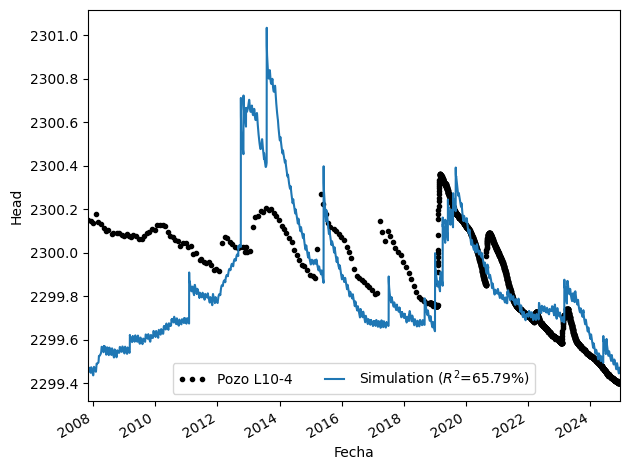

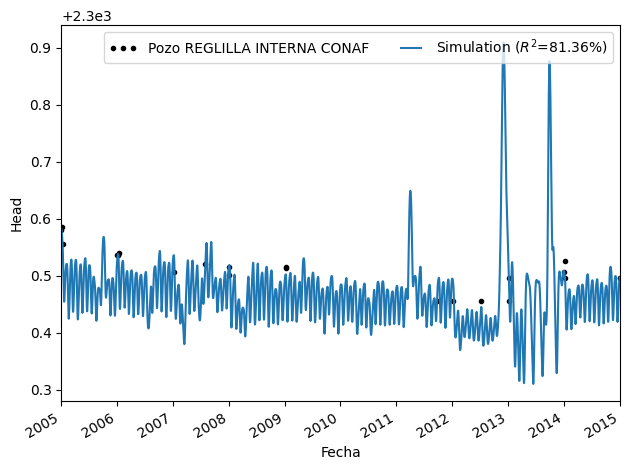

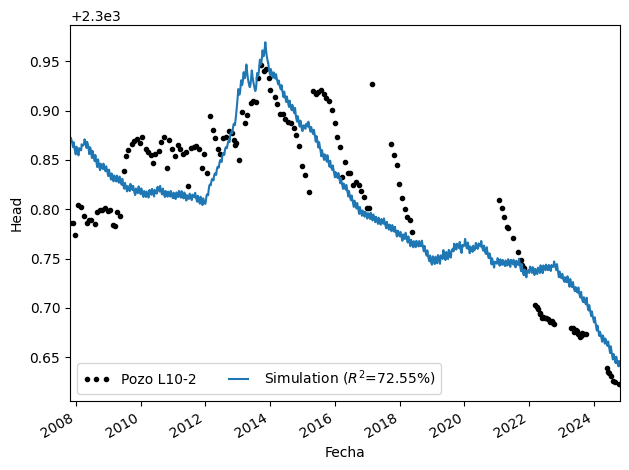

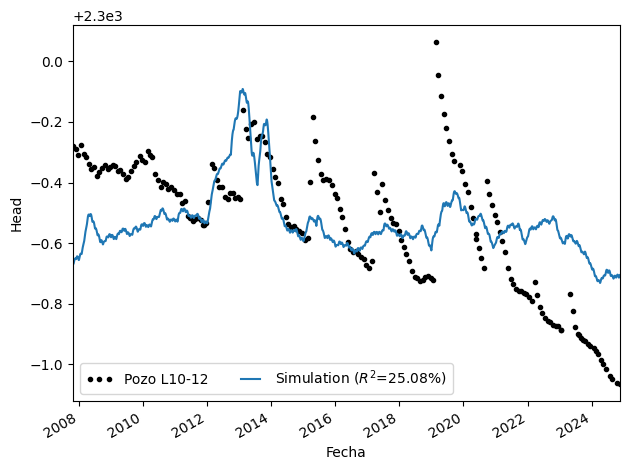

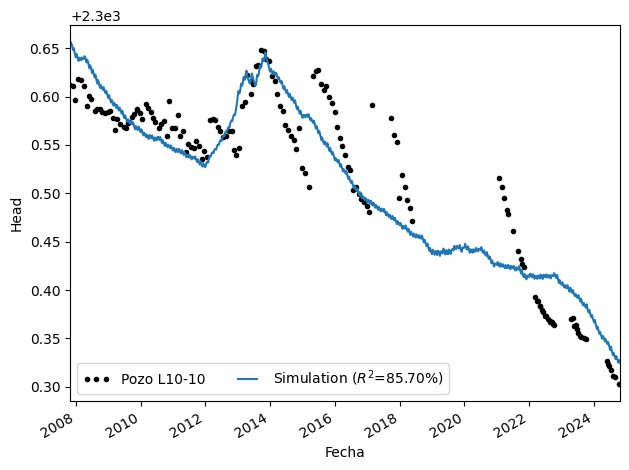

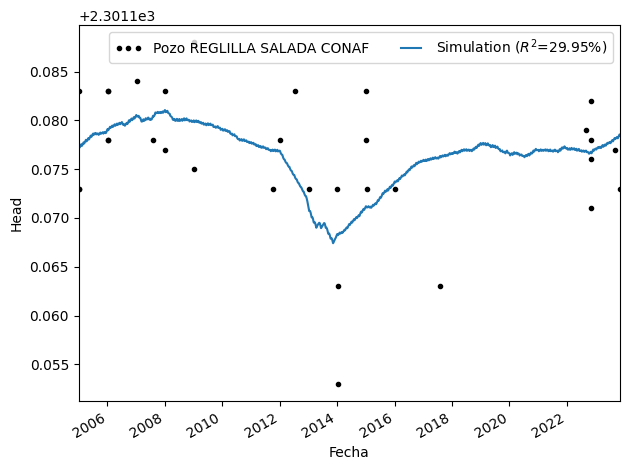

In [113]:
#Old"


# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "Pozo REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.8, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        ml.solve()
        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        # #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # # ml2.add_stressmodel(sm_wel2)
        # # ml.add_stressmodel(sm_mon)
        # # ml2.add_stressmodel(sm_til)
        # # ml.add_stressmodel(sm_neg)
        # # ml2.add_stressmodel(sm_tuc)
        
        # ml.solve()

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        ml.plot()
        # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        ml.stats.summary()
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        
